In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# 1 Leia o arquivo X.npy

In [3]:
X = np.load('X.npy')

# 2 Imprima a imagem da primeira pessoa.

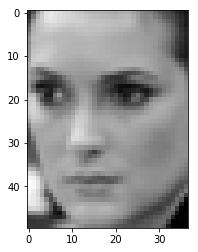

In [4]:
reshaped_image = np.reshape(X[0], (50,37))

plt.imshow(reshaped_image, cmap ='gray')

# 3 Faça a fatoração svd da matriz X.

In [5]:
u1, d1, vt1 = np.linalg.svd(X, full_matrices=True)
print(u1.shape, d1.shape, vt1.shape)

u2, d2, vt2 = np.linalg.svd(X, full_matrices=False)
print(u2.shape, d2.shape, vt2.shape)

(3023, 3023) (1850,) (1850, 1850)
(3023, 1850) (1850,) (1850, 1850)


In [6]:
print("Usando full_matrice True")
print("Matrix X: mxn", X.shape)
print("Matrix U: mxm", u1.shape)
print("Matrix D: mxn", np.diag(d1).shape) #dado que D é um array de 1 dim com valores de uma matriz diagonal
print("Matrix Vt: nxn", vt1.shape)

print("\nUsando full_matrices False")
print("Matrix X: mxn", X.shape)
print("Matrix U: mxm", u2.shape)
print("Matrix D: nxn", np.diag(d2).shape) #dado que D é um array de 1 dim com valores de uma matriz diagonal
print("Matrix Vt: nxn", vt2.shape)

Usando full_matrice True
Matrix X: mxn (3023, 1850)
Matrix U: mxm (3023, 3023)
Matrix D: mxn (1850, 1850)
Matrix Vt: nxn (1850, 1850)

Usando full_matrices False
Matrix X: mxn (3023, 1850)
Matrix U: mxm (3023, 1850)
Matrix D: nxn (1850, 1850)
Matrix Vt: nxn (1850, 1850)


# 4 Verifique a 2a formulação

In [7]:
errors = X - u2 @ np.diag(d2) @ vt2 #Multiplicando as matrizes

original_mean_X = X.mean()
print("Média dos valores de X: ",original_mean_X) 
max_error = np.absolute(errors).max()
print("Maior erro: ", max_error)

Média dos valores de X:  129.54884
Maior erro:  0.00039672852


# 5 Compute a matriz reduzida e a matriz reconstruída
### 5.1 matriz reduzida

In [8]:
k = 150
# pega somente as primeiras k colunas
uk = u1[:,0:150] # -Uk
dk = np.diag(d1)[0:150,0:150] # -Dk # 150 linhas x 150 colunas

reduced_X = ((uk)) @ ((dk)) #ME CONFUNDI COM OS NEGATIVOS, REMOVI TODOS E aparentemente o resultado é o mesmo
print("Matriz reduzida: ", reduced_X.shape)

Matriz reduzida:  (3023, 150)


### 5.2 matriz reconstruída

In [9]:
vtk = vt1[0:150,:]
rebuilded_X = uk @ dk @ (vtk)
print("Matriz reconstruída: ", rebuilded_X.shape)

Matriz reconstruída:  (3023, 1850)


# 6 Imprima a imagem reconstruída da 1a pessoa redução

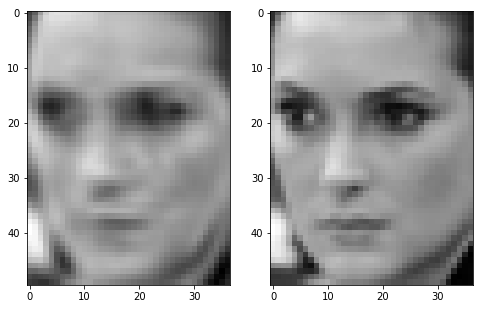

In [10]:
rebuilded_reshaped_image = np.reshape(rebuilded_X[0], (50,37))

# Para colocar as imagens lado a lado
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(rebuilded_reshaped_image, cmap ='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(reshaped_image, cmap ='gray')

# 7 Use o TruncatedSVD do scikit-learn

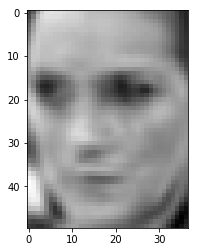

In [11]:
svd = TruncatedSVD(n_components=k)

reduced_X_sklearn = svd.fit_transform(X) # reduz

original_X_sklearn = svd.inverse_transform(reduced_X_sklearn) # reconstrói

rebuilded_reshaped_image_sklearn = np.reshape(rebuilded_X[0], (50,37)) # reshape

plt.imshow(rebuilded_reshaped_image_sklearn, cmap ='gray')

# 8 Imprima as imagens das eigenfaces

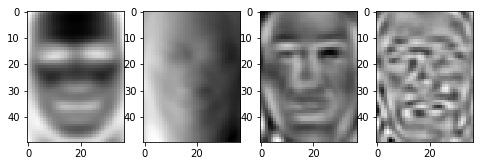

In [19]:
eigenface1 = np.reshape(vtk[0], (50,37))
eigenface2 = np.reshape(vtk[1], (50,37))
eigenface50 = np.reshape(vtk[49], (50,37))
eigenface150 = np.reshape(vtk[149], (50,37))

fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 4, 1)
plt.imshow(eigenface1, cmap ='gray')
fig.add_subplot(1, 4, 2)
plt.imshow(eigenface2, cmap ='gray')
fig.add_subplot(1, 4, 3)
plt.imshow(eigenface50, cmap ='gray')
fig.add_subplot(1, 4, 4)
plt.imshow(eigenface150, cmap ='gray')